# Introduction
We will create a K-means class from scratch. We will implement the algorithm using only the minimum library such as NumPy.



In [242]:
# predefines and imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Problem 1
Determining init center points

In [243]:
from sklearn.datasets import make_blobs
np.random.seed(0)
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [244]:
def random_center(X,k, verbose = False):
    choosen_indexes = np.sort(np.random.choice(np.arange(X.shape[0]), size = k, replace = False))
    if verbose: print('Center index Choice: ',choosen_indexes)
    return X[choosen_indexes]
print('Data shape: ', X.shape)
n_clusters = 5

centers = random_center(X,5, verbose = True)
print('Centers: ',centers)


Data shape:  (100, 2)
Center index Choice:  [ 2 26 55 75 86]
Centers:  [[ 1.35678894  4.36462484]
 [-0.565433    3.65813966]
 [-1.26041884  7.46644456]
 [ 1.40848818  3.93270482]
 [ 1.60161834  0.92363636]]


# Problem 2
Sum Square Error

Chosen centers:  [[1 1]
 [3 6]]
SSE:  2


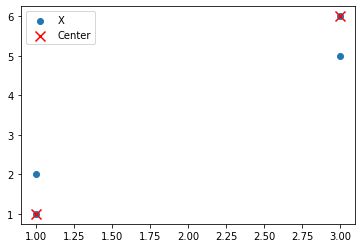

In [245]:
def sse(X,C, assigned_labels):
    sum_error = 0
    for label, center in enumerate(C):
        sum_error += np.where(assigned_labels == label, 1, 0).reshape(-1,1) * (X - center.reshape(1,-1))**2
    return sum_error.sum()
sse_x = np.array([
    [1,1],
    [1,2],
    [3,5],
    [3,6],
])
np.random.seed(123)
sse_center = random_center(sse_x,2)
print('Chosen centers: ', sse_center)
assigned_labels = np.array([0,0,1,1,])
print('SSE: ', sse(sse_x, sse_center,assigned_labels))

plt.scatter(sse_x[:,0], sse_x[:,1], label = 'X')
plt.scatter(sse_center[:,0], sse_center[:,1], marker = 'x', s = 100, color = 'red', label = 'Center')
plt.legend()
plt.show()

# Problem 3
Allocation to cluster

In [246]:
from numpy.linalg import norm
def allocate_to_cluster(X,C, verbose = False):
    distance = np.zeros((X.shape[0], C.shape[0]))
    for label, center in enumerate(C):
        distance[:,label] = norm(X - center.reshape(1, -1), axis = 1)
    if verbose: print('Distance: \n',distance)
    return np.argmin(distance, axis = 1)
print('X')
print(sse_x)
print('Centers')
print(sse_center)
print('Result')
print('Allocation: ',allocate_to_cluster(sse_x,sse_center,verbose = True))

X
[[1 1]
 [1 2]
 [3 5]
 [3 6]]
Centers
[[1 1]
 [3 6]]
Result
Distance: 
 [[0.         5.38516481]
 [1.         4.47213595]
 [4.47213595 1.        ]
 [5.38516481 0.        ]]
Allocation:  [0 0 1 1]


# Simple data for later testing

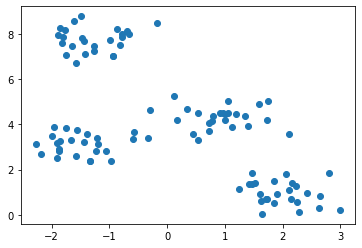

In [247]:
np.random.seed(0)
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
plt.scatter(X[:,0],X[:,1])

# Problem 4
Movement of the center point

In [248]:
def move_centers(X, assigned_label, k):
    new_centers = []
    for label in range(k):
        cluster = X[assigned_label == label]
        new_centers.append(np.average(cluster, axis = 0))
    return np.array(new_centers)
        

## Testing out centroid assignment

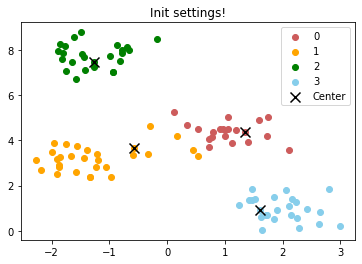

In [249]:
np.random.seed(0)
k = 4
init_centroids = random_center(X,4)
init_labels = allocate_to_cluster(X,init_centroids)

cluster_color = ['indianred', 'orange', 'green', 'skyblue']
for i in range(k):
    plt.scatter(X[init_labels == i][:,0], X[init_labels == i][:,1],c=cluster_color[i], label = str(i))
plt.scatter(init_centroids[:,0], init_centroids[:,1], marker = 'x', s = 100, color = 'black', label = 'Center')
plt.legend()
plt.title('Init settings!')
plt.show()

New centers:
[[ 1.06148307  4.39922699]
 [-1.24587768  3.22980708]
 [-1.26811733  7.76378266]
 [ 1.99186903  0.96561071]]


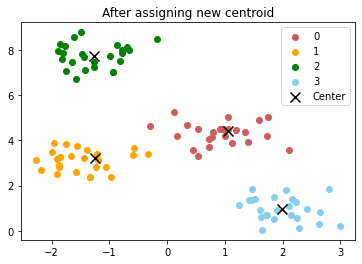

In [250]:
new_centers = move_centers(X,init_labels,k)
new_labels = allocate_to_cluster(X,new_centers)

print('New centers:')
print(new_centers)

for i in range(k):
    plt.scatter(X[new_labels == i][:,0], X[new_labels == i][:,1],c=cluster_color[i], label = str(i))
plt.scatter(new_centers[:,0], new_centers[:,1], marker = 'x', s = 100, color = 'black', label = 'Center')
plt.legend()
plt.title('After assigning new centroid')
plt.show()

# Problem 5
Repeat

In [251]:
def plot_clusters(X, centroids, labels, x_test = None, y_test = None, k=4, title = 'Clustering Status'):
    cluster_color = ['indianred', 'orange', 'green', 'skyblue', 'brown', 'blue','red','black']
    for i in range(k):
        plt.scatter(X[labels == i][:,0], X[labels == i][:,1],c=cluster_color[i], label = str(i), alpha = 0.5)
    plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s = 100, color = 'black', label = 'Center')
    
    if x_test is not None:
        for i in range(k):
            plt.scatter(x_test[y_test == i][:,0], x_test[y_test == i][:,1],c=cluster_color[i], label = 'test '+str(i), marker = '.')
    plt.legend()
    plt.title(title)
    plt.show()


Init Settings:
SS-Error:  84.33640249455568


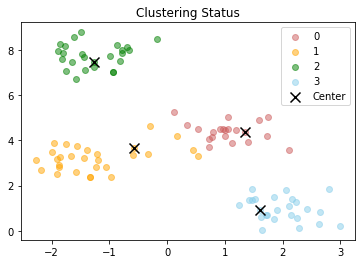

Ilteration:  0
SS-Error:  50.912773104155825


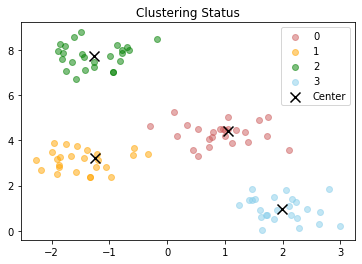

Ilteration:  1
SS-Error:  48.63378320706403


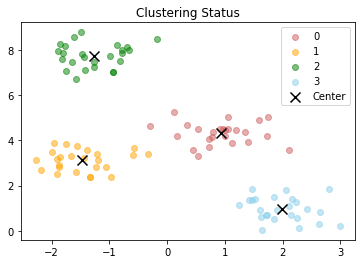

Ilteration:  2
SS-Error:  48.63378320706403


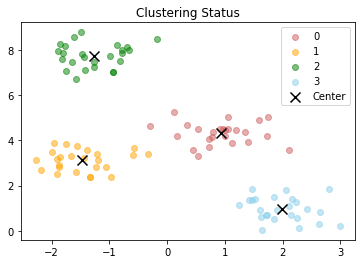

Ilteration:  3
SS-Error:  48.63378320706403


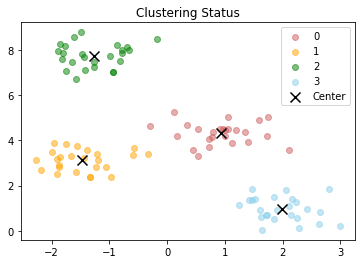

Ilteration:  4
SS-Error:  48.63378320706403


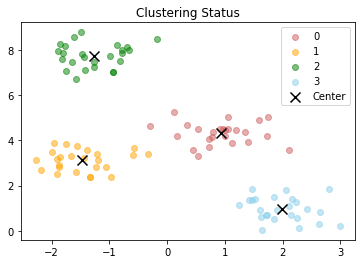

(array([[ 0.92578447,  4.32475792],
        [-1.47935679,  3.11716896],
        [-1.26811733,  7.76378266],
        [ 1.99186903,  0.96561071]]),
 array([0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 3, 3, 1, 1, 3, 0, 2,
        1, 3, 0, 1, 1, 0, 3, 3, 3, 2, 3, 3, 1, 0, 2, 3, 2, 1, 0, 1, 2, 1,
        1, 2, 3, 1, 0, 0, 0, 3, 1, 1, 1, 2, 2, 3, 3, 2, 2, 3, 3, 0, 3, 2,
        1, 1, 3, 0, 2, 3, 0, 2, 0, 0, 1, 1, 3, 3, 3, 2, 1, 0, 3, 1, 3, 3,
        0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0], dtype=int64),
 48.63378320706403)

In [252]:
np.random.seed(0)
# X, _ = make_blobs(n_samples=10, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
# plt.scatter(X[:,0],X[:,1])
# plt.show()
max_iter = 5
tolerance = 1e-4
k = 4
verbose = True
plotting = True
#init
def k_mean_train_test(X,k,max_iter,tolerance,verbose,plotting, seed):
    np.random.seed(seed)
    centroids = random_center(X,4)
    labels = allocate_to_cluster(X,centroids)
    if verbose:
            print('Init Settings:')
            print('SS-Error: ', sse(X,centroids,labels))
            if plotting: plot_clusters(X,centroids,labels)

    for i in range(max_iter):
        centroids = move_centers(X,labels,k)
        labels = allocate_to_cluster(X,centroids)
        error = sse(X,centroids,labels)
        if verbose:
            print('Ilteration: ', i)
            print('SS-Error: ', error)
            if plotting: plot_clusters(X,centroids,labels)
        if sse(X,centroids,labels) <= tolerance: break
    return centroids, labels, error
k_mean_train_test(X,k,max_iter,tolerance,verbose,plotting, 0)
    

### NOTE: it can be seen that the model converges in just 3 ilterations

# Problem 6
Calculate with different init values

Test with seed:  0
Final Error:  48.63378320706403
Final Cluster: 


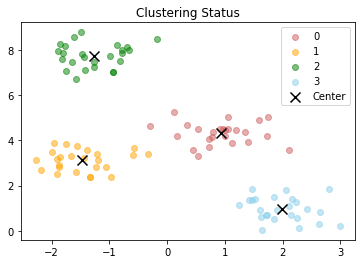

Test with seed:  1
Final Error:  132.22875558038203
Final Cluster: 


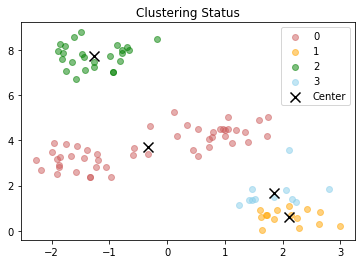

Test with seed:  2
Final Error:  48.63378320706403
Final Cluster: 


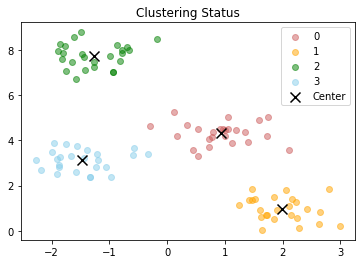

Test with seed:  3
Final Error:  48.63378320706403
Final Cluster: 


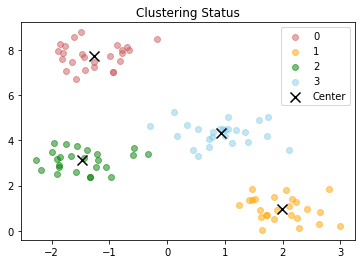

Test with seed:  4
Final Error:  48.63378320706403
Final Cluster: 


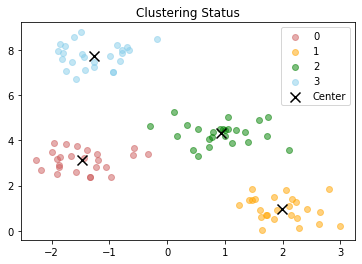

Test with seed:  5
Final Error:  134.9583863094452
Final Cluster: 


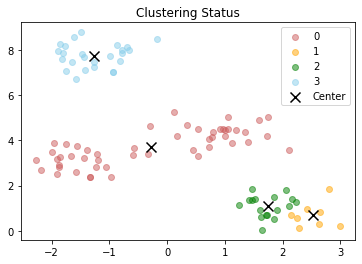

Best result amont different init results:  48.63378320706403


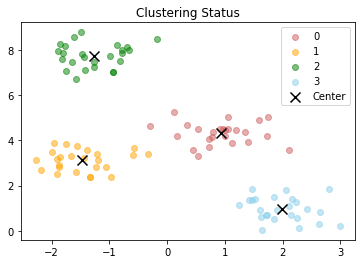

In [253]:
min_error, best_centroid, best_labels = 99999999999999 , None, None
for seed in [0,1,2,3,4,5]:
    centroids, labels , error= k_mean_train_test(X,k,100,tolerance,verbose = False,plotting = False, seed = seed)
    print('Test with seed: ', seed)
    print('Final Error: ', error)
    print('Final Cluster: ')
    plot_clusters(X,centroids,labels)
    if error < min_error:
        min_error = error
        best_centroid = centroids
        best_labels = labels

print('Best result amont different init results: ', min_error)
plot_clusters(X,best_centroid,best_labels)

### NOTE: So it can be seen that init center choice does affect the final result

# Kmean Prototype

In [254]:
class ScratchKMeans():
  """
  K-means scratch implementation
  Parameters
  ----------
  n_clusters : int
    Number of clusters
  n_init : int
    How many times to change the initial value of the center point for calculation
  max_iter : int
    Maximum number of iterations in one calculation
  tol : float
    Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
  verbose : bool
    True to output the learning process
  """
  def __init__(self, n_clusters, n_init, max_iter, tol, verbose=0, graphing = 0):
    self.n_clusters = n_clusters
    self.n_init = n_init
    self.iter = max_iter
    self.tol = tol
    self.verbose = verbose
    self.graphing = graphing
  def fit(self, X):
    """
    Calculate clustering by K-means
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
        Features of training data
    """
    np.random.seed(0)
    seeds = np.arange(self.n_init)
    min_error = np.inf
    best_centroids, best_labels, best_seed = None, None, None
    for seed in seeds:
      if self.verbose > 0:
        print('----------------------------')
        print('Training With Seed: ', seed)

      centroids,labels,error = self._train_once(X,seed)
      if error < min_error:
        min_error = error
        best_centroids = centroids
        best_labels = labels
        best_seed = seed

      if self.verbose > 0:
        print('..TRAIN RESULT..')
        print('Training Eror: ', error)
        if self.graphing > 0: plot_clusters(X,centroids,labels, k = self.n_clusters, title = 'Training Result')
    
    self.centroids = best_centroids
    self.min_error = min_error
    self.labels = best_labels
    if self.verbose > 0:
      print('=================================')
      print('Final Error: ', min_error)
      print('Best init seed: ', best_seed)
      if self.graphing > 0: plot_clusters(X,best_centroids,best_labels, k = self.n_clusters, title = 'BEST CLUSTER')
      

  def _train_once(self,X, seed):
    centroids = self.random_centroids(X,seed)
    labels = self.assign_label(X,centroids)
    if self.verbose > 0:
      print('Init Settings:')
      print('Init SS-Error: ', self.sum_squared_error(X,centroids,labels))
      if self.graphing > 0: plot_clusters(X,centroids,labels,k = self.n_clusters, title = 'Initial n_clusters')

    for i in range(self.iter):
        centroids = self.move_centers(X,labels)
        labels = self.assign_label(X,centroids)
        error = self.sum_squared_error(X,centroids,labels)
        if self.verbose > 1:
            print('Ilteration: ', i)
            print('SS-Error: ', error)
            if self.graphing > 1: plot_clusters(X,centroids,labels,k = self.n_clusters)
        if self.sum_squared_error(X,centroids,labels) <= self.tol: break
    
    return centroids , labels, error
    
  
  def assign_label(self,X,C):
    distance = np.zeros((X.shape[0], C.shape[0]))
    for label, center in enumerate(C):
        distance[:,label] = norm(X - center.reshape(1, -1), axis = 1)
    return np.argmin(distance, axis = 1)
    
  def random_centroids(self,X,seed):
    np.random.seed(seed)
    choosen_indexes = np.sort(np.random.choice(np.arange(X.shape[0]), size = self.n_clusters, replace = False))
    return X[choosen_indexes]
  def move_centers(self,X, assigned_label):
    new_centers = []
    for label in range(self.n_clusters):
        cluster = X[assigned_label == label]
        new_centers.append(np.average(cluster, axis = 0))
    return np.array(new_centers)
  def sum_squared_error(self,X,C, assigned_labels):
    sum_error = 0
    for label, center in enumerate(C):
        sum_error += np.where(assigned_labels == label, 1, 0).reshape(-1,1) * (X - center.reshape(1,-1))**2
    return sum_error.sum()
  def predict(self, X):
    """
    Calculate which cluster the input data belongs to
    """
    pred = self.assign_label(X,self.centroids)
    return pred

----------------------------
Training With Seed:  0
Init Settings:
Init SS-Error:  460.15763952434145


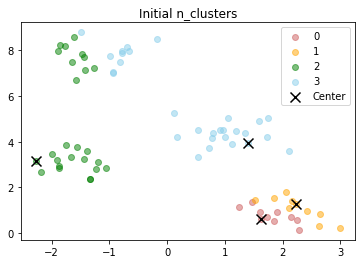

..TRAIN RESULT..
Training Eror:  32.769023914102675


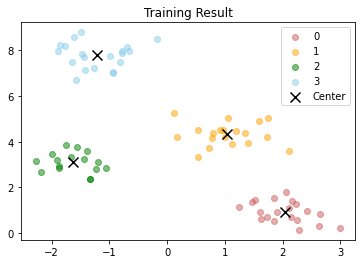

----------------------------
Training With Seed:  1
Init Settings:
Init SS-Error:  371.3963167797906


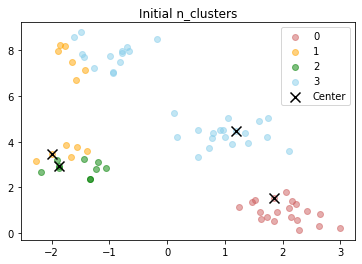

..TRAIN RESULT..
Training Eror:  32.769023914102675


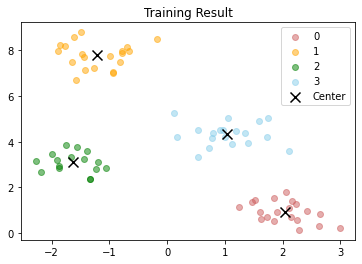

----------------------------
Training With Seed:  2
Init Settings:
Init SS-Error:  224.7801944105987


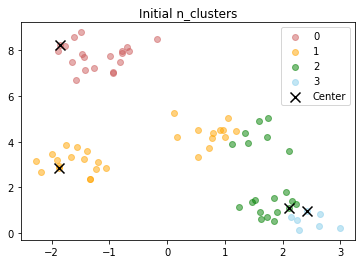

..TRAIN RESULT..
Training Eror:  32.769023914102675


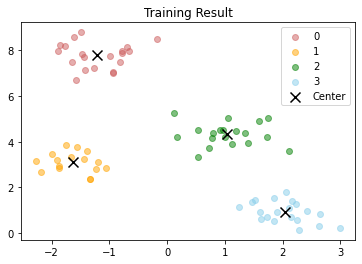

Final Error:  32.769023914102675
Best init seed:  0


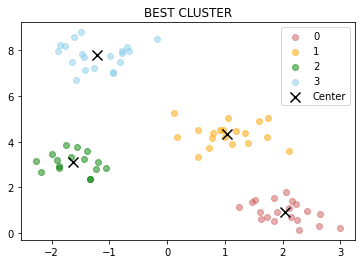

In [255]:
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(X)
model = ScratchKMeans(4,3,100,1e-4,verbose = 1, graphing = 1)
model.fit(x_train)

# Problem 7
Estimation

[2 2 3 0 0 2 0 1 3 1 2 2 0 2 0 3 2 2 3 2 1 1 3 1 1]


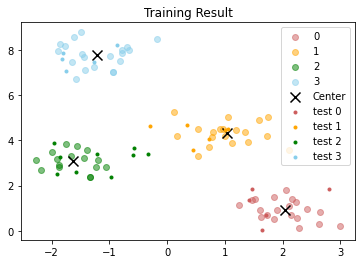

In [256]:
pred = model.predict(x_test)
print(pred)

C = model.centroids
plot_clusters(x_train,C,model.assign_label(x_train,C), x_test = x_test, y_test = pred, k = model.n_clusters, title = 'Training Result')

# Problem 8
Elbow Method

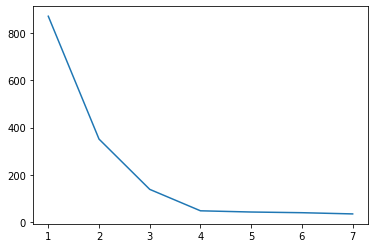

In [257]:
err = []
for k in range(1,8):
    temp_model = ScratchKMeans(k,5,100,1e-4)
    temp_model.fit(X)
    err.append(temp_model.min_error)
plt.plot(range(1,8), err)
    
    

### NOTE: The elbow methods shows that error levels at around 4 clusters -> best n-cluster choice

# Problem 9
Silhouette diagram

In [258]:
def cluster_distance(Xi, cluster):
    return norm(cluster - Xi, axis = 1)
def silhouette_coeff(X,C,labels,k, index, verbose = False):
    Xi = X[index].reshape(1,-1)
    current_label = labels[index]
    current_cluster = X[ labels == current_label]
    cohesion = cluster_distance(Xi, current_cluster).sum() / (len(current_cluster) - 1) 
    if verbose: print('cohe: ', cohesion)
    degree_divergence = np.min([
        cluster_distance(Xi, X[labels == label]).mean()
        for label in range(k) 
        if label != current_label
        ])
    if verbose: print('degree_diver: ', degree_divergence)
    return (degree_divergence - cohesion) / max(degree_divergence,cohesion)

print('Testint on index 0')
print('Silhouette coef:', silhouette_coeff(X,C, model.predict(X), 4, 0, verbose = True))

Testint on index 0
cohe:  0.9051268415076197
degree_diver:  2.3239485868923837
Silhouette coef: 0.610522002675641


In [259]:
from matplotlib import cm

def silhouette_diagram(silhouette_vals, silhouette_avg,y_km, cluster_labels,n_clusters):
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.title('N cluster: ' + str(n_clusters) + '\n' +'Avg Silhouette: ' + str(silhouette_avg))
    plt.show()

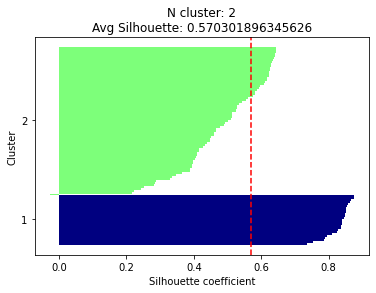

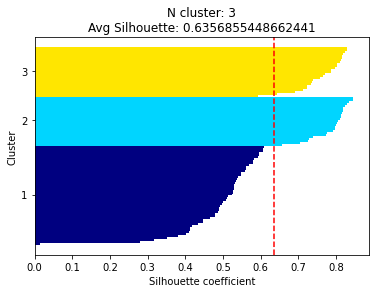

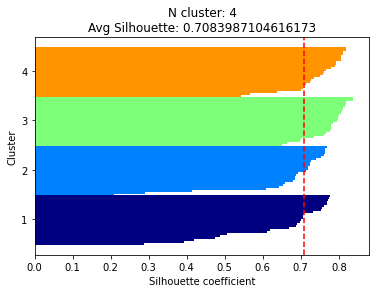

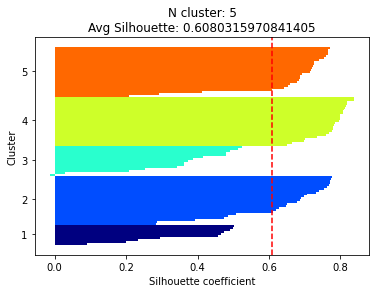

In [260]:
for k in range(2,6):
    temp_model = ScratchKMeans(k,5,100,1e-4)
    temp_model.fit(X)
    y_km = temp_model.predict(X)
    C = temp_model.centroids
    silhouette_vals = np.array([silhouette_coeff(X,C, y_km , k, i) for i in range(len(X))])
    silhouette_avg = silhouette_vals.mean()
    cluster_labels = np.array(range(k))
    n_clusters = k
    silhouette_diagram(silhouette_vals,silhouette_avg, y_km, cluster_labels,n_clusters)

### NOTE: For Silhouette plot
- The plot shows the silhouette coeff of each point -> each cluster and the red dotted line indicate the average coeff value.
- A good graph would have high average value and low cluster silhouette coefficient variance, meaning the clusters are all overlapping the average line.
- The result shows n-cluster of 2,3,5,6 to be bad due to high variance and low average coeff. Leading to best being 4

# Whole Sale Data Analysis
Download Wholesale customers data.csv from the Data Folder. This is data collected from customers by a wholesaler in Lisbon, Portugal. The contents are data on how many euros each customer buys milk and groceries each year. Customers are retail stores and restaurants. Region and Channel are peeped and K-means is used for monetary data.

In [261]:
whole_sale_data = pd.read_csv('../Data/Normal/Wholesale_customers_data.csv')
channel = whole_sale_data['Channel']
region = whole_sale_data['Region']
whole_sale_data = whole_sale_data.drop(columns = ['Channel', 'Region'])

whole_sale_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [262]:
data = whole_sale_data.to_numpy()
print('Shape: ', data.shape)
data[:5,:]

Shape:  (440, 6)


array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       [13265,  1196,  4221,  6404,   507,  1788],
       [22615,  5410,  7198,  3915,  1777,  5185]], dtype=int64)

# Dim Reduction
Sample code below

In [263]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)
data_pca.shape

(440, 2)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


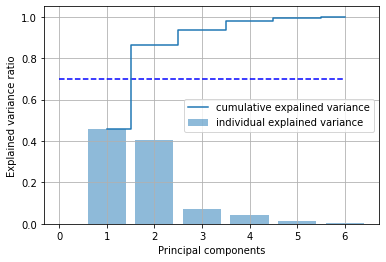

In [264]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

### NOTE: On PCA
- **IDEA:** The main idea is that a multidimentional data can be discribed by it's variance or Principle Components, one variance (PC) corresponds to one dimension. PC can vary in each dimension, thus some are more important than others. Because of this, as the graph above suggest, PC1 and PC2 can quite accurately describe the main essence of our data set
- BUT PCA assume this variance based on linear combination of feature, thus can not perform well in many case!

# Problem 10
Selecting Cluster Number K

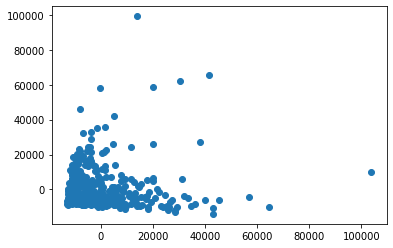

In [265]:
X = data_pca
plt.scatter(X[:,0],X[:,1])

### NOTE: Clustering visually
Visually, there's no pattern for clustering, if by intuition, i would say there's a big cluster near center and a few smaller ones out to the edges -> ~4 clusters

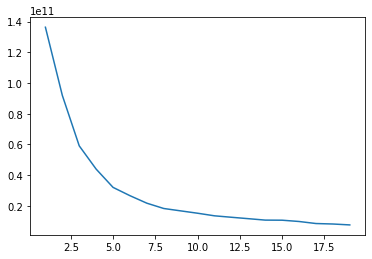

In [266]:
# Elbow
err = []
for k in range(1,20):
    temp_model = ScratchKMeans(k,5,100,1e-4)
    temp_model.fit(X)
    err.append(temp_model.min_error)
plt.plot(range(1,20), err)

### NOTE: Elbow
There's not a definitive 'elbow' here to choose!

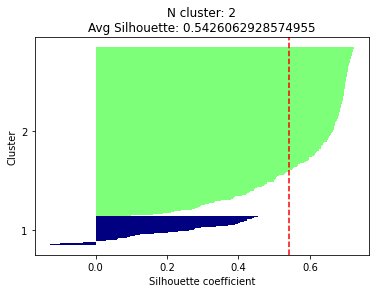

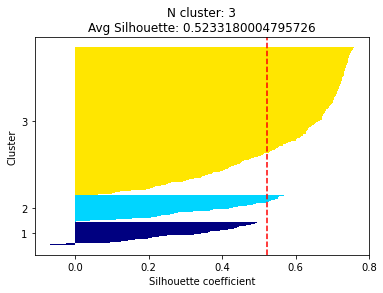

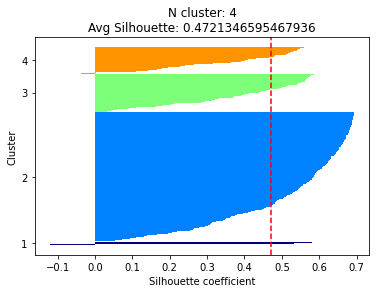

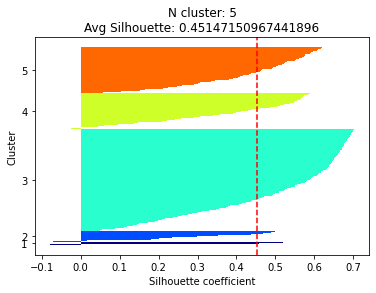

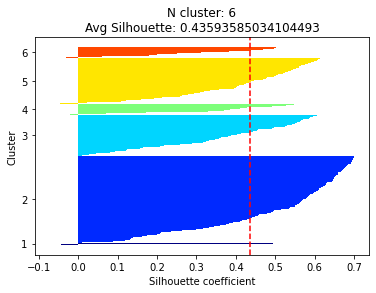

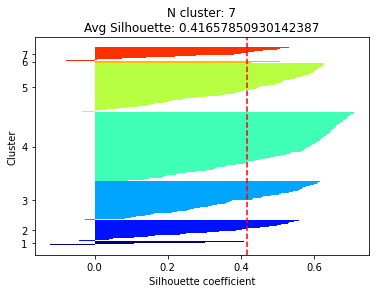

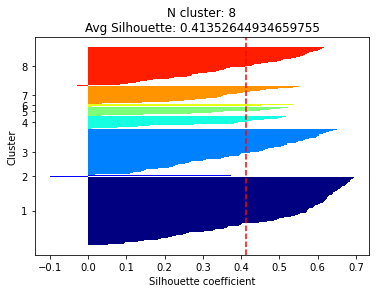

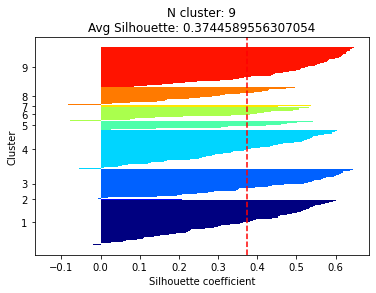

Text(0.5, 1.0, 'Silhouette Avg for each n_cluster')

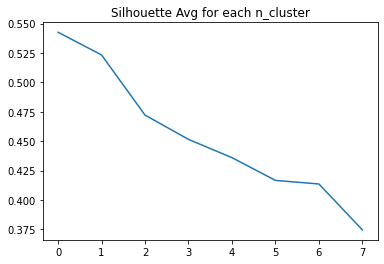

In [267]:
# silhouette
silo_avgs = []
for k in range(2,10):
    temp_model = ScratchKMeans(k,5,100,1e-4)
    temp_model.fit(X)
    y_km = temp_model.predict(X)
    C = temp_model.centroids
    silhouette_vals = np.array([silhouette_coeff(X,C, y_km , k, i) for i in range(len(X))])
    silhouette_avg = silhouette_vals.mean()
    cluster_labels = np.array(range(k))
    n_clusters = k
    silo_avgs.append(silhouette_avg)
    silhouette_diagram(silhouette_vals,silhouette_avg, y_km, cluster_labels,n_clusters)
plt.plot(silo_avgs)
plt.title('Silhouette Avg for each n_cluster')

### NOTE: Silhouette:
From the charts, i would choose 3 and 4 to be the best choice of clustering due to acceptably high average coeeficent and lower variance compared to others.

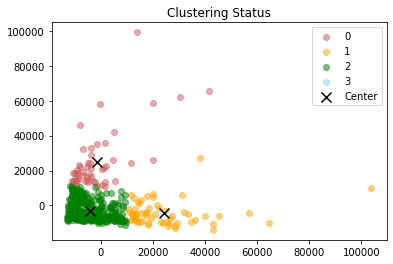

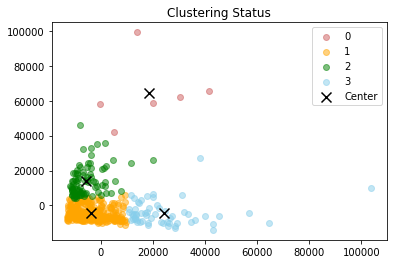

In [268]:
# cluster 3 grouping result
model = ScratchKMeans(3,5,100,1e-4)
model.fit(X)
labels = model.predict(X)
plot_clusters(X,model.centroids, labels)
# cluster 4 grouping result
model = ScratchKMeans(4,5,100,1e-4)
model.fit(X)
labels = model.predict(X)
plot_clusters(X,model.centroids, labels)

# Problem 11
Comparision with known groups

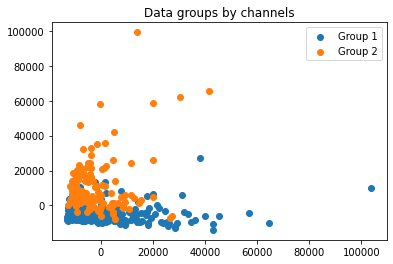

In [269]:
# ploting group by channel
for c in np.unique(channel):
    plt.scatter(X[channel == c][:,0], X[channel == c][:,1], label = 'Group ' + str(c))
plt.legend()
plt.title('Data groups by channels')
plt.show()


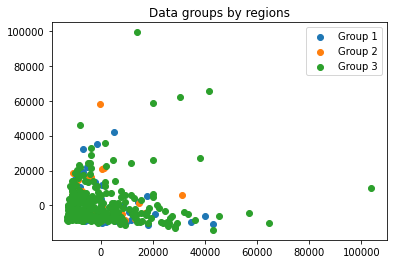

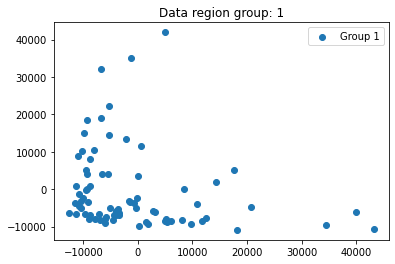

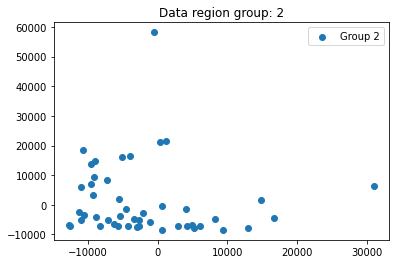

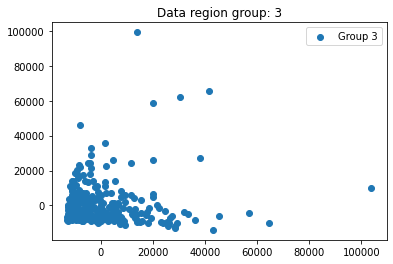

In [270]:
# ploting group by channel
for r in np.unique(region):
    plt.scatter(X[region == r][:,0], X[region == r][:,1], label = 'Group ' + str(r))
plt.legend()
plt.title('Data groups by regions')
plt.show()

for r in np.unique(region):
    plt.scatter(X[region == r][:,0], X[region == r][:,1], label = 'Group ' + str(r))
    plt.legend()
    plt.title('Data region group: ' + str(r))
    plt.show()

### NOTE: Compare my cluster result with real result
Seems like the dimension reduction has made our dataset very hard to cluster, thus result and prediction is completely appart, as seen from the result, most of result's clusters are actually overlapped!

# Problem 12
Useful information for wholesaler

In [271]:
# we'll use data before dim reduction
X = whole_sale_data
print(X.shape)
print(X.columns)

(440, 6)
Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')


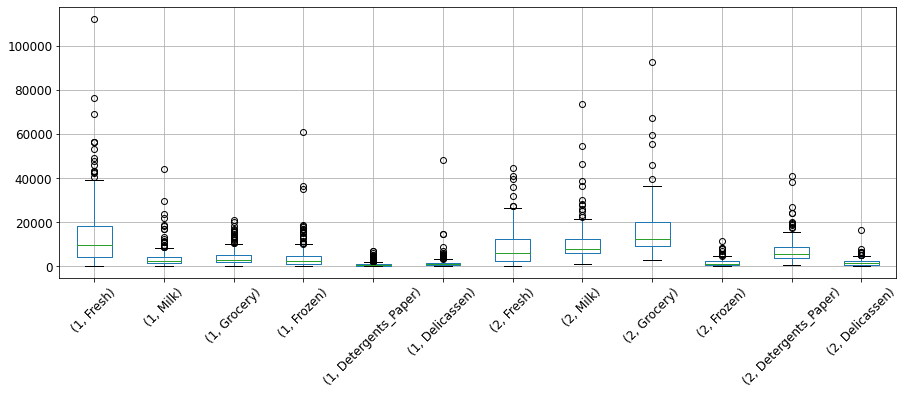

In [272]:
X.groupby(channel).boxplot(rot=45, fontsize=12, figsize=(15,5), subplots=False)
plt.show()

### NOTE: From boxplot grouping channel
- Group 2 of channel has more average milk, grocery and Detergents_Paper
- Group 1 has more in Fresh and frozen

<AxesSubplot:>

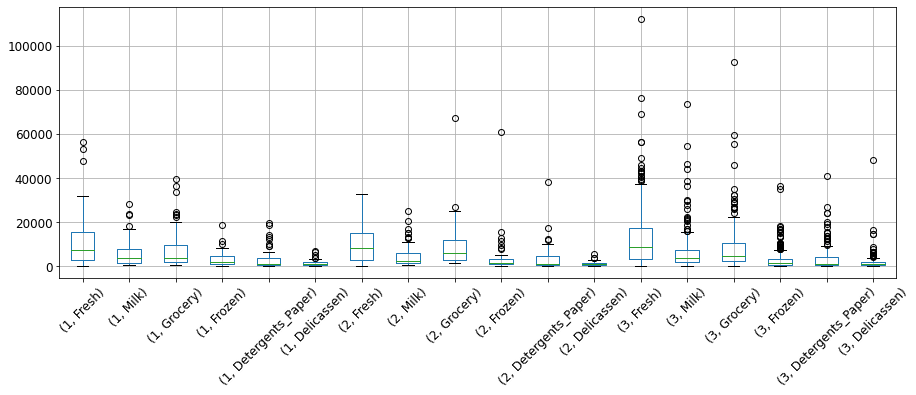

In [273]:
X.groupby(region).boxplot(rot=45, fontsize=12, figsize=(15,5), subplots = False)

### NOTE: From boxplot grouping channel
- Group 3 has highest variance and high outliers, indicating precious whale (super buyer)
- Besides from that, there are other differences but not by a huge margin!

# Problem 13
 Investigation of other methods


### NOTE: on DB-Scan
- **Idea** Continuously: Repeat the below until all is clustered or finish ilteration
    - Choose a non-clustered datapoint as start
    - Add all points around the first point's parameter (circumference) into the group
    - Repeat the scanning for all the added point until cant reach any new points
    - Set the group as a cluster if the number of point is larger than a min_point threshold.
- Advantage:
    - No need to know cluster count
    - Can cluster any shape
    - Tweaking circumference (epsion) and threshold (min_point) allow for different result
    - Not much affected by noise, outlier
- Disadvantage:
    - Need to manually set params (epsilon an min_point)
    - Fail to cluster if datast is to spreaded out
    - Different clustering density cant be correctly detected and cluster due to the algorithm only have one fixed value for epsilon.
    - DBSCAN in some situation can be non-deterministic due to one borderpoint being reachable from differet cluster, leading to different results (though this does not affect the final result very much in most case) [Link](https://en.wikipedia.org/wiki/DBSCAN#:~:text=DBSCAN%20is%20not%20entirely%20deterministic,order%20the%20data%20are%20processed.)
- References:
    - [1](https://www.youtube.com/watch?v=_A9Tq6mGtLI)
    - [2](https://www.youtube.com/watch?v=0Os5AydChR0)
    - [3](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

### NOTE: on T-SNE and LLE

#### t-SNE (t-distributed stochastic neighbor embedding)
- **IDEA**: Calculate the similarity matrix for the initial points, than project the points randomly on to a lower dimension and proceed to move the points nudge by nudge until the new similarity matrix matches the original matrix, thus having the same points in clusters as with the original high dimension
- Advantage:
    - Can handle non-linear data
    - Preserve local and global struture
- Disadvantage:
    - Computation: nudging takes time!
    - Quite random/non-deterministic
    - Has hyper param to tune! (i havent look into this yet)
- References:
    - [1](http://theprofessionalspoint.blogspot.com/2019/03/advantages-and-disadvantages-of-t-sne.html)
    - [2](https://www.youtube.com/watch?v=NEaUSP4YerM&t=629s)

#### LLE: Locally Linear Embedding
- **IDEA:** Calculate neighbors for each point and assign weights accordingly, then later reconstruct those points based on the cost function (weight/neighbor related) in a lower dimension
- Advantage:
    - Can deal with non-linear space
    - Quite computationally cheap and fast
- Disadvantage:
    - Fail on much noise
    - Only handle uniform shapes(no holes)
- References:
    - [1](https://www.youtube.com/watch?v=scMntW3s-Wk)
    - [2](https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction#:~:text=Locally%2DLinear%20Embedding%20(LLE),better%20results%20with%20many%20problems.)

# Problem 14
Use of t-SNE and DBSCAN

In [274]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
X = whole_sale_data

X_embedded = TSNE(n_components=2, learning_rate = 100).fit_transform(X)

Clusters:  [-1]


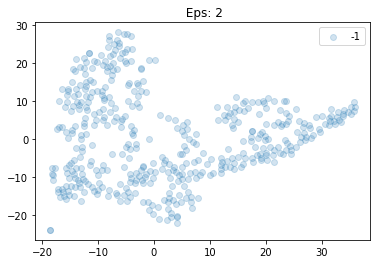

Clusters:  [-1]


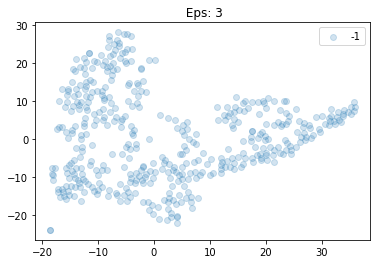

Clusters:  [-1  0  1  2  3]


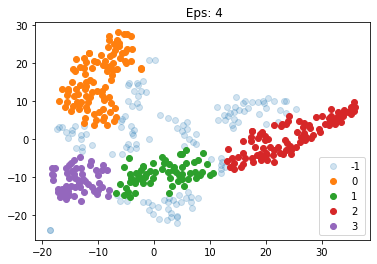

Clusters:  [-1  0  1]


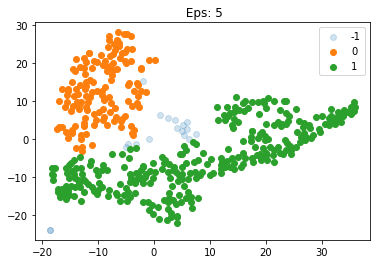

Clusters:  [-1  0]


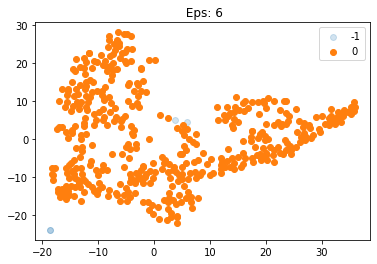

Clusters:  [-1  0]


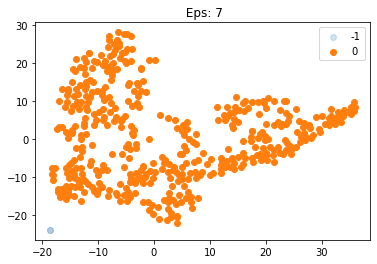

In [275]:
for eps in [2,3,4,5,6,7]:
        model = DBSCAN(eps=eps, min_samples=20)
        model.fit(X_embedded)
        labels = model.labels_
        unique_labels = np.unique(labels)
        print('Clusters: ', unique_labels)
        for label in unique_labels:
            if label == -1: 
                plt.scatter(X_embedded[labels == label][:,0],X_embedded[labels == label][:,1], label = str(label), alpha = 0.2)
                continue
            plt.scatter(X_embedded[labels == label][:,0],X_embedded[labels == label][:,1], label = str(label))
        plt.title( ' Eps: ' + str(eps))
        plt.legend()
        plt.show()

### NOTE: Result
We have a 2 main clusters , one outlier cluster with DBSCAN epsilon = 5, quite similar to real clusters separated by channel as seen in problem 11

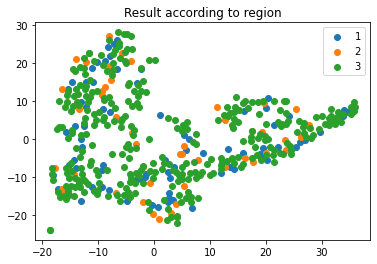

In [295]:
for label in np.unique(region):
    plt.scatter(X_embedded[region == label][:,0],X_embedded[region == label][:,1], label = str(label))
plt.title('Result according to region')
plt.legend()
plt.show()

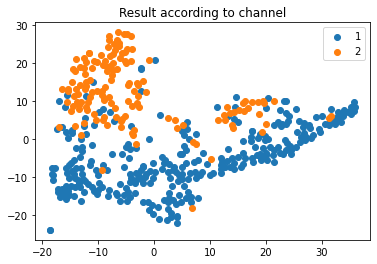

In [294]:
for label in np.unique(channel):
    plt.scatter(X_embedded[channel == label][:,0],X_embedded[channel == label][:,1], label = str(label))
plt.title('Result according to channel')
plt.legend()
plt.show()

### NOTE: Seems like our epsilon 5 result matches with the groups in channel pretty well!
Some numeric calculation to show accuracy is below

In [303]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
final_model = DBSCAN(eps = 5, min_samples=20)
final_model.fit(X_embedded)
labels = final_model.labels_

print('Our labels: ', np.unique(labels))
print('Real labels (channel): ', np.unique(channel))

#translate our labels
print('Translating label 1 -> 2 and others -> 1 to match result')
labels = np.where(labels == 1, 1, 2)

#compare result
print('Conf matrix:')
print(confusion_matrix(labels, channel))
#acc
print('Acc: ', accuracy_score(labels, channel))


Our labels:  [-1  0  1]
Real labels (channel):  [1 2]
Translating label 1 -> 2 and others -> 1 to match result
Conf matrix:
[[257  28]
 [ 41 114]]
Acc:  0.8431818181818181
